# Introduction to Forecasting
In the previous section we fit various smoothing models to existing data. The purpose behind this is to predict what happens next.<br>
What's our best guess for next month's value? For the next six months?

In this section we'll look to extend our models into the future. First we'll divide known data into training and testing sets, and evaluate the performance of a trained model on known test data.

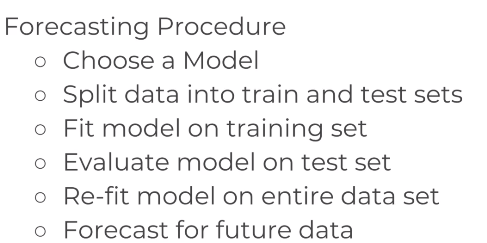

* Goals
  * Compare a Holt-Winters forecasted model to known data
  * Understand <em>stationarity</em>, <em>differencing</em> and <em>lagging</em>
  * Introduce ARIMA and describe next steps

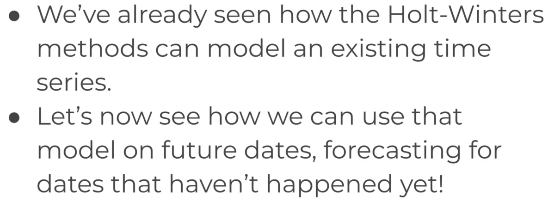

### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

## Forecasting with the Holt-Winters Method
For this example we'll use the same airline_passengers dataset, and we'll split the data into 108 training records and 36 testing records. Then we'll evaluate the performance of the model.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

url="https://raw.githubusercontent.com/GeoTurkey/GMT_COURSES/main/airline_passengers.csv"

df = pd.read_csv(url,index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

In [ ]:
len(df)

## Train Test Split

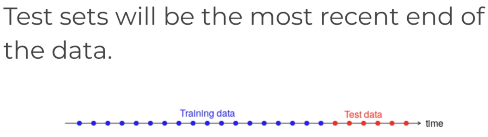

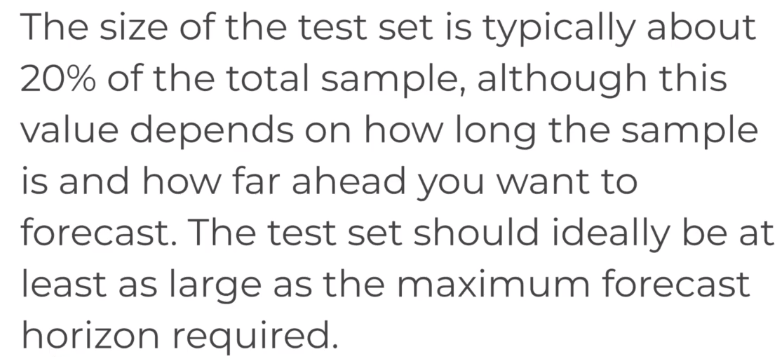

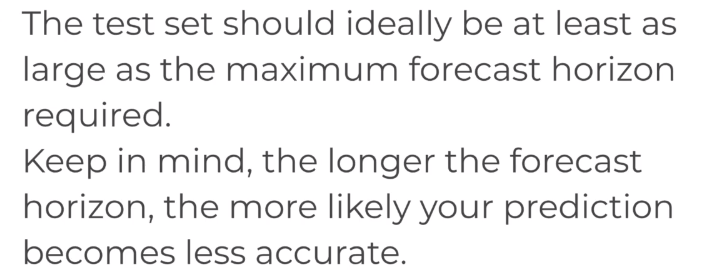

In [ ]:
test_size = 36 # 36 months ---- 3 years
train_size = len(df)-test_size # 144 - 36 = 108 months -> 9 years
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:len(df)]
print(len(train_data))
print(len(test_data))

---------------------------------------

In [ ]:
#train_data = df.loc[:"1957-12-01"]
#test_data = df.loc["1958-01-01":]
#print(len(train_data))
#print(len(test_data))

## Fitting the Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                    trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

## Evaluating Model against Test Set

In [ ]:
# YOU CAN SAFELY IGNORE WARNINGS HERE!
# THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [ ]:
test_predictions

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## Evaluation Metrics

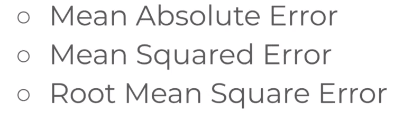

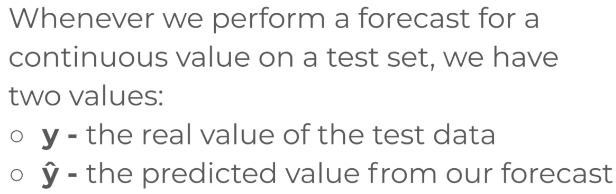

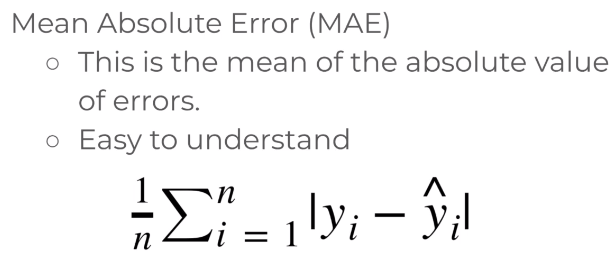

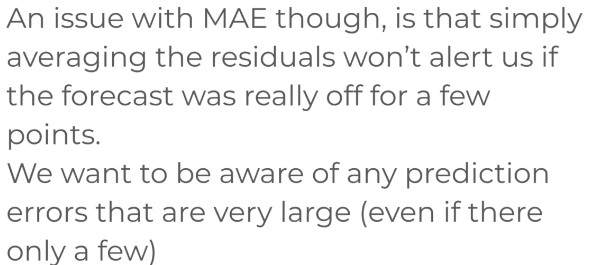

In [ ]:
##############################################

In [ ]:
##############################################

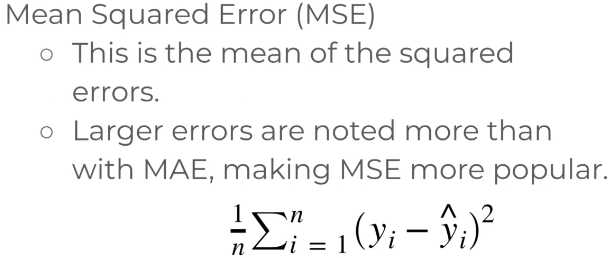

Here you are punishing the model for a large error.

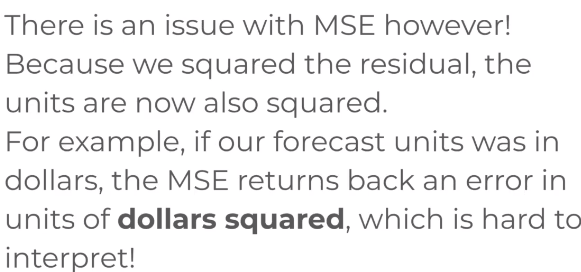

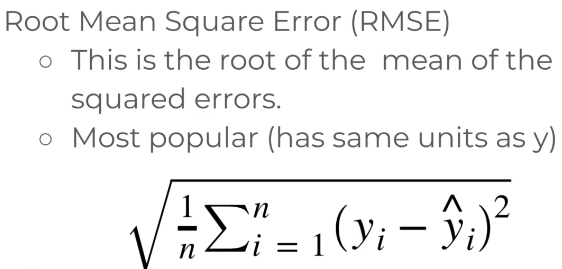

#### What is an acceptable RMSE value ?

The answer is complicated and depends on your data!.

For example RMSE=1000.0 for data with MEAN: 1000000.0

or

RMSE = 1.0 for data with MEAN : 5.0

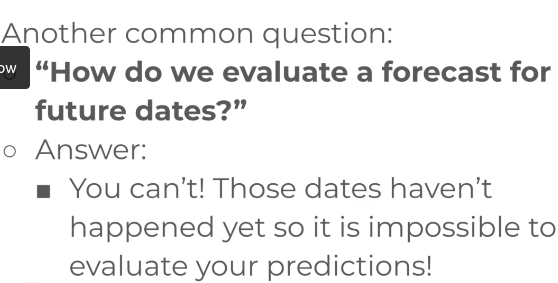

#### This is why so important to perform the train test split on our data! Otherwise, we wouldn't have any intuition to how well the model can perform dates it hasn't seen yet. 


In [ ]:
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

******************************************************************************************************************************************************************************************************

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
test_data.describe()

In [ ]:
mean_absolute_error(test_data,test_predictions)

In [ ]:
mean_squared_error(test_data,test_predictions)

In [ ]:
np.sqrt(mean_squared_error(test_data,test_predictions))

## Forecasting into Future

In [ ]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [ ]:
forecast_predictions = final_model.forecast(36)

In [ ]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();

# Stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.<br>
The file <tt>samples.csv</tt> contains made-up datasets that illustrate stationary and non-stationary data.

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/stationarity.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Stationarity and differencing</font></div>

In [2]:
url2 = "https://raw.githubusercontent.com/GeoTurkey/GMT_COURSES/main/samples.csv"
df2 = pd.read_csv(url2,index_col=0,parse_dates=True)
df2.head()

NameError: name 'pd' is not defined

In [ ]:
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

In [ ]:
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In [ ]:
df2['c'].plot(ylim=[0,10000],title="MORE NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In [ ]:
df2["b"]

In [ ]:
df2["b"].shift(1)

In an upcoming section we'll learn how to test for stationarity.

# Differencing
## First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.


In [ ]:
# Calculate the first difference of the non-stationary dataset "b"
df2['d1b'] = df2['b'] - df2['b'].shift(1)

In [ ]:
df2[['b','d1b']].head()

Notice that differencing eliminates one or more rows of data from the beginning of the series.

In [ ]:
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

An easier way to perform differencing on a pandas Series or DataFrame is to use the built-in <tt>.diff()</tt> method:

In [ ]:
df2['d1b'] = df2['b'].diff()

df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

### Forecasting on first order differenced data
When forecasting with first order differences, the predicted values have to be added back in to the original values in order to obtain an appropriate forecast.

Let's say that the next five forecasted values after applying some model to <tt>df['d1b']</tt> are <tt>[7,-2,5,-1,12]</tt>. We need to perform an <em>inverse transformation</em> to obtain values in the scale of the original time series.

In [ ]:
# For our example we need to build a forecast series from scratch
# First determine the most recent date in the training set, to know where the forecast set should start
df2[['b']].tail(3)

In [ ]:
# Next set a DateTime index for the forecast set that extends 5 periods into the future
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

The idea behind an inverse transformation is to start with the most recent value from the training set, and to add a cumulative sum of Fcast values to build the new forecast set. For this we'll use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

In [ ]:
z['forecast']=df2['b'].iloc[-1] + z['Fcast'].cumsum()
z

In [ ]:
df2['b'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

## Second order differencing
Sometimes the first difference is not enough to attain stationarity, particularly if the trend is not linear. We can difference the already differenced values again to obtain a second order set of values.

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_{t}^{\prime} - y_{t-1}^{\prime} \\
&= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
&= y_t - 2y_{t-1} + y_{t-2}\end{split}$

In [ ]:
# First we'll look at the first order difference of dataset "c"
df2['d1c'] = df2['c'].diff()

df2['d1c'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

Now let's apply a second order difference to dataset "c".

In [ ]:
# We can do this from the original time series in one step
df2['d2c'] = df2['c'].diff().diff()

df2[['c','d1c','d2c']].head()

In [ ]:
df2['d2c'].plot(title="SECOND ORDER DIFFERENCE").autoscale(axis='x',tight=True);

In [ ]:
from statsmodels.tsa.statespace.tools import diff
df2['d2c'] = diff(df2['c'],k_diff=2)

<div class="alert alert-info"><strong>NOTE: </strong>This is different from <font color=black><tt>df2['c'].diff(2)</tt></font>, which would provide a first order difference spaced 2 lags apart.<br>
We'll use this technique later to address seasonality.</div>

### Forecasting on second order differenced data
As before, the prediction values have to be added back in to obtain an appropriate forecast.

To invert the second order transformation and obtain forecasted values for $\hat y_t$ we have to solve the second order equation for $y_t$:

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_t - 2y_{t-1} + y_{t-2} \\
y_t &= y_{t}^{\prime\prime} + 2y_{t-1} - y_{t-2}\end{split}$

Let's say that the next five forecasted values after applying some model to <tt>df['d2c']</tt> are <tt>[7,-2,5,-1,12]</tt>.

In [ ]:
# For our example we need to build a forecast series from scratch
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

One way to invert a 2nd order transformation is to follow the formula above:

In [ ]:
forecast = []

# Capture the two most recent values from the training set
v2,v1 = df2['c'].iloc[-2:]

# Apply the formula
for i in z['Fcast']:
    newval = i + 2*v1 - v2
    forecast.append(newval)
    v2,v1 = v1,newval

z['forecast']=forecast
z

Another, perhaps more straightforward method is to create a first difference set from the second, then build the forecast set from the first difference. We'll again use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

In [ ]:
# Add the most recent first difference from the training set to the Fcast cumulative sum
z['firstdiff'] = (df2['c'].iloc[-1]-df2['c'].iloc[-2]) + z['Fcast'].cumsum()

# Now build the forecast values from the first difference set
z['forecast'] = df2['c'].iloc[-1] + z['firstdiff'].cumsum()

z[['Fcast','firstdiff','forecast']]

In [ ]:
df2['c'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

<div class="alert alert-danger"><strong>NOTE:</strong> statsmodels has a built-in differencing tool:<br>
    
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;from statsmodels.tsa.statespace.tools import diff<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;df2['d1'] = diff(df2['b'],k_diff=1)</font></tt><br><br>
    
that performs the same first order differencing operation shown above. We chose not to use it here because seasonal differencing is somewhat complicated. To difference based on 12 lags, the code would be<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = diff(df2['b'],k_diff=0,k_seasonal_diff=1,seasonal_periods=12)
</font></tt><br><br>

whereas with pandas it's simply<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = df2['b'].diff(12)
</font></tt>
</div>

## Lagging
Also known as "backshifting", lagging notation reflects the value of $y$ at a prior point in time. This is a useful technique for performing <em>regressions</em> as we'll see in upcoming sections.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}
<br><br>
<table>
<tr><td>$y_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>
